In [459]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [460]:
time <- 20

In [461]:
mypath <- "../../log/ProvaEmailcontacts2.5"

In [462]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [463]:
thepath = list.dirs(mypath)[1]

In [464]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [465]:
DF <- read.csv(file = filename, skip=12)

In [466]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [467]:
tempDF

,time,agent,k.core,state,degree
1162,1,1161,1,i,1


In [468]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [469]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [470]:
DT <- data.table(DF)

In [471]:
DT1 = DT[, sum(density), by=list(time, state)]

In [472]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [473]:
DT1$density <- DT1$density / 12625

In [474]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [475]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 20]
density <- as.numeric(tempDT1[,'density'])

In [476]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [477]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / 12625

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 20]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

[1] "../../log/ProvaEmailcontacts2.5/2019_27_02_12_34_35/k_core.csv"
[1] "../../log/ProvaEmailcontacts2.5/2019_27_02_12_34_37/k_core.csv"
[1] "../../log/ProvaEmailcontacts2.5/2019_27_02_12_34_38/k_core.csv"


Compute mean and standard deviation and add to data table

In [478]:
emptytabletime <- emptytable[emptytable$time == 20]
#emptytabletime <- emptytabletime[emptytabletime$density > 0.26]
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 20][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 20][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [479]:
toplot[is.na(toplot)] <- 0

In [480]:
toplot

k.core.init,mean,std
1,0.000237623762376,0
23,0.000158415841584,0


Plot

Warning message in arrows(toplot$k.core.init, toplot$mean - toplot$std, toplot$k.core.init, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(toplot$k.core.init, toplot$mean - toplot$std, toplot$k.core.init, :
“zero-length arrow is of indeterminate angle and so skipped”

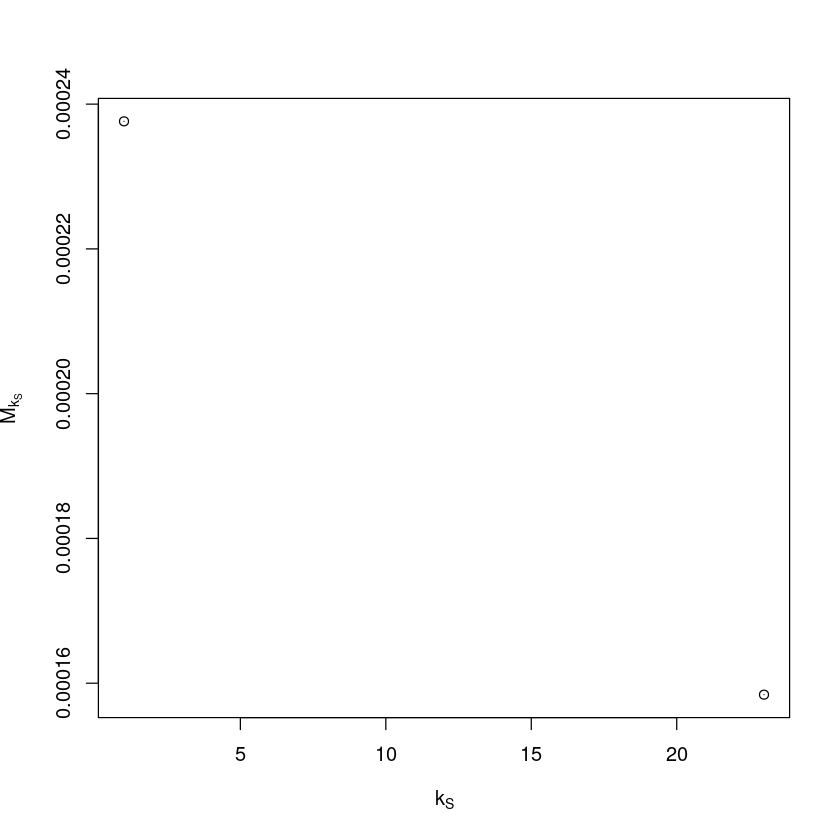

In [481]:
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)


Log y plot

Warning message in arrows(toplot$k.core.init, toplot$mean - toplot$std, toplot$k.core.init, :
“zero-length arrow is of indeterminate angle and so skipped”Warning message in arrows(toplot$k.core.init, toplot$mean - toplot$std, toplot$k.core.init, :
“zero-length arrow is of indeterminate angle and so skipped”

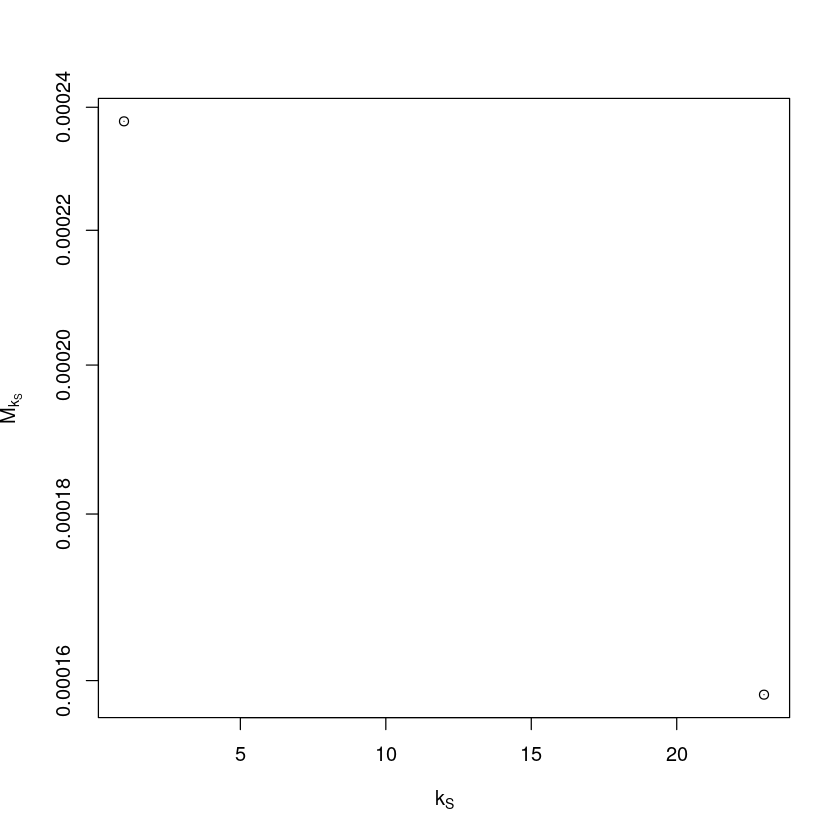

In [482]:
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)